In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

In [3]:
cacao = pd.read_csv('cacao_flavors.csv')

In [4]:
display(cacao.head(10))

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [5]:
cacao.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [6]:
len(cacao)

1795

In [7]:
cacao.nunique()

Bar id                               1795
Company \n(Maker-if known)            408
Specific Bean Origin\nor Bar Name    1013
REF                                   440
Review\nDate                           12
Cocoa\nPercent                         59
Company\nLocation                      60
Rating                                 34
Bean\nType                             41
Broad Bean\nOrigin                    100
dtype: int64

In [8]:
cacao[cacao['Company \n(Maker-if known)'].str.contains('^\s')]['Company \n(Maker-if known)'].head().tolist()
#cacao[cacao['Company \n(Maker-if known)'].str.contains('^\s\w*', regex= True, na=False)]['Company \n(Maker-if known)'].head().tolist()

['\xa0', '\xa0', '\xa0', '\xa0', '\xa0']

In [9]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
                 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']

In [15]:
#Столбцы с пробелами в качестве отсутствующих значений
columns_with_spaces = []
def search_empty_values(column):
    if str(cacao[column].dtype) == 'object':
        if True in ((cacao[column].str.strip() == '').tolist()):
            columns_with_spaces.append(column)
            
for col in cacao.columns.tolist():    
    search_empty_values(col)
    
print(columns_with_spaces)

['company', 'specific_origin', 'bean_type', 'broad_origin']


In [10]:
cacao.head(6)

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


### bar_id

1795


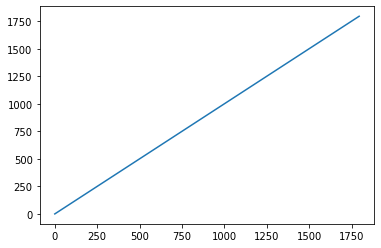

In [11]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [12]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

### company

In [13]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
The Barn,1
Vietcacao (A. Morin),1
Marigold's Finest,1
Xocolat,1


In [14]:
cacao.company.nunique()

408

In [15]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [16]:
display(cacao.company.value_counts().head(35))
#display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

Soma                          45
Fresco                        26
Bonnat                        26
Pralus                        25
Domori                        22
A. Morin                      21
Valrhona                      21
Arete                         20
Hotel Chocolat (Coppeneur)    18
Guittard                      18
Zotter                        17
Scharffen Berger              17
Dandelion                     16
Mast Brothers                 16
Rogue                         16
Coppeneur                     16
Szanto Tibor                  15
Smooth Chocolator, The        15
Castronovo                    14
Duffy's                       13
Bittersweet Origins           13
Artisan du Chocolat           13
Pierre Marcolini              13
Tejas                         12
Amedei                        12
Pacari                        12
Dick Taylor                   12
Madre                         11
Palette de Bine               11
Friis Holm (Bonnat)           11
Altus aka 

Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


### specific_origin

In [17]:
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
Wild Bolivia,1
"Piura Blanco, Norandino",1
"Dominican Republic, Coop",1
"Porcelana, Tabasco, Mexico",1


In [18]:
cacao.specific_origin.nunique()

1013

In [19]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [20]:
cacao.specific_origin.nunique()

1012

In [21]:
display(cacao.specific_origin.value_counts().head(35))
#display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

Madagascar                        55
Peru                              44
Ecuador                           39
Dominican Republic                33
Venezuela                         21
Sambirano                         18
Chuao                             18
Ocumare                           16
Ghana                             15
Papua New Guinea                  15
Belize                            13
Bolivia                           12
Tanzania                          11
Brazil                            11
La Red                            11
Carenero Superior                 10
Costa Rica                        10
Grenada                           10
Trinidad                          10
Porcelana                         10
Maya Mountain                     10
Manabi                             9
Conacado                           9
Nicaragua                          9
Hispaniola                         8
Jamaica                            8
San Martin                         8
P

Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1737 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


### ref

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

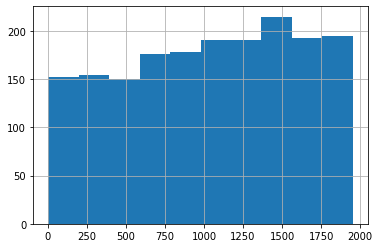

In [22]:
cacao.ref.hist()
cacao.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

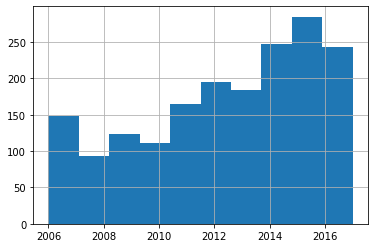

In [23]:
cacao.review_date.hist()
cacao.review_date.describe()

In [24]:
iqr = cacao.review_date.describe()['75%'] - cacao.review_date.describe()['25%']
iqr

5.0

In [25]:
df_q = cacao.review_date.quantile([0.25, 0.5, 0.75], interpolation = 'midpoint')
df_q

0.25    2010.0
0.50    2013.0
0.75    2015.0
Name: review_date, dtype: float64

In [26]:
2010 - 1.5*5#граница нижних выбросов

2002.5

In [27]:
2015 + 1.5*5#граница верхних выбросов

2022.5

In [28]:
len(cacao[cacao.review_date > 2015 + 1.5*5])

0

In [29]:
len(cacao[cacao.review_date < 2010 - 1.5*5])

0

### cocoa_percent

In [30]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [31]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

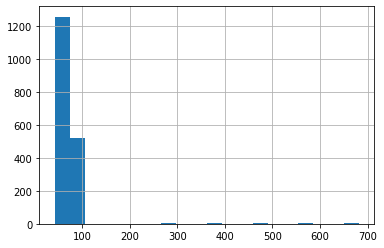

In [32]:
cacao.cocoa_percent.hist(bins=20)
cacao.cocoa_percent.describe()

In [33]:
df_q = cacao.cocoa_percent.quantile([0.25, 0.5, 0.75], interpolation = 'midpoint')
df_q

0.25    70.0
0.50    70.0
0.75    75.0
Name: cocoa_percent, dtype: float64

In [34]:
iqr = df_q[0.75] - df_q[0.25]
iqr

5.0

In [35]:
len(cacao[cacao['cocoa_percent'] < df_q[0.25] - 1.5*iqr])

97

In [36]:
len(cacao[cacao['cocoa_percent'] > df_q[0.75] + 1.5*iqr])

108

Медиана: 70.0, 25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


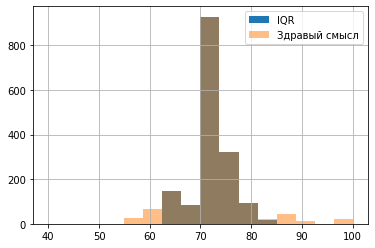

In [37]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('Медиана: {},'.format(median),'25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] \
                   .hist(bins = 16, range = (40, 100), label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100] \
                   .hist(alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
plt.legend();

In [38]:
cacao.cocoa_percent.loc[cacao.cocoa_percent > 100]

2       670.0
203     475.0
220     270.0
400     580.0
522     470.0
540     576.0
581     270.0
741     582.0
827     570.0
1139    265.0
1154    270.0
1158    668.0
1167    670.0
1178    571.0
1216    375.0
1383    270.0
1439    682.0
1561    380.0
1785    375.0
Name: cocoa_percent, dtype: float64

### company_location

In [39]:
cacao.company_location

0        France
1        France
2        France
3        France
4        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1795, dtype: object

In [40]:
display(cacao.company_location.value_counts())#.head(35))
#display(pd.DataFrame(cacao.company_location.value_counts()))

print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

U.S.A.            764
France            156
Canada            125
U.K.               96
Italy              63
                 ... 
Martinique          1
Eucador             1
Czech Republic      1
Wales               1
Philippines         1
Name: company_location, Length: 60, dtype: int64

Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [41]:
cacao.company_location.nunique()

60

In [42]:
cacao[cacao['company_location'].str.strip() == '']

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin


### rating

In [43]:
cacao.rating

0       11.50
1        2.75
2        3.00
3        3.50
4        3.50
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1795, dtype: float64

count    1795.000000
mean        3.422981
std         1.750584
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

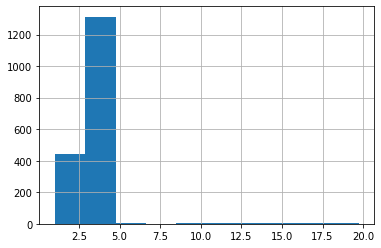

In [44]:
cacao.rating.hist()
cacao.rating.describe()

Медиана: 3.25, 25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


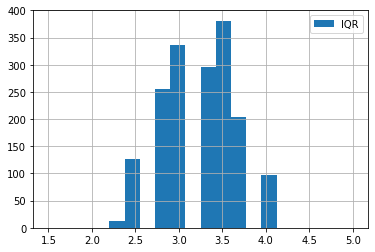

In [47]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('Медиана: {},'.format(median), '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, range = (1.5, 5), 
                                                                                             label = 'IQR')
plt.legend();

In [48]:
cacao.rating.quantile(0.5)

3.25

In [49]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    1708.000000
mean        3.220726
std         0.416795
min         2.250000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: rating, dtype: float64

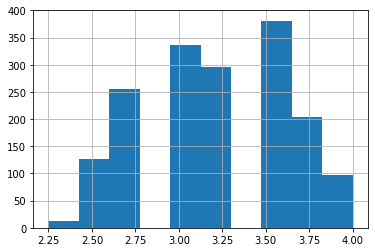

In [50]:
cacao.rating.hist()
cacao.rating.describe()

### bean_type

In [51]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [52]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Criollo,149
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",38
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  868 non-null    object
dtypes: object(1)
memory usage: 26.7+ KB


In [53]:
cacao.loc[:, ['bean_type']]

,bean_type
1,None
2,None
3,None
4,None
5,Criollo
...,...
1790,None
1791,Forastero
1792,Forastero
1793,None


In [54]:
x = 'Criollo (Ocumare 61)'
x[:x.find('(')].strip()

'Criollo'

In [55]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [56]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,409
Forastero,179
Criollo,167
"Criollo, Trinitario",38
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
Matina,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  867 non-null    object
dtypes: object(1)
memory usage: 26.7+ KB


In [57]:
cacao[cacao['bean_type'] == 'None']

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin


In [58]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if x == 'None' else x)

In [59]:
cacao[cacao['bean_type'] == 'None']

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin


In [60]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,409
Forastero,179
Criollo,167
"Criollo, Trinitario",38
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
Matina,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  867 non-null    object
dtypes: object(1)
memory usage: 26.7+ KB


### broad_origin

In [61]:
cacao.broad_origin

1            Togo
2            Togo
3            Togo
4            Peru
5       Venezuela
          ...    
1790         Peru
1791        Congo
1792        India
1793        India
1794       Brazil
Name: broad_origin, Length: 1708, dtype: object

In [62]:
cacao[cacao.broad_origin.str.strip() == '']

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
77,Amedei,Nine,111,2007,75.0,Italy,4.00,Blend,
85,Amedei,Toscano Black,170,2007,63.0,Italy,3.50,Blend,
87,Amedei,Toscano Black,75,2006,66.0,Italy,4.00,Blend,
144,Bahen & Co.,Houseblend,1474,2015,80.0,Australia,3.25,None,
148,Bahen & Co.,None,999,2012,70.0,Australia,2.50,Blend,
...,...,...,...,...,...,...,...,...,...
1766,Zak's,"House Blend, Batch 2",1582,2015,60.0,U.S.A.,3.00,None,
1774,Zokoko,Goddess Blend,1780,2016,65.0,Australia,3.25,None,
1778,Zotter,Raw,1205,2014,80.0,Austria,2.75,None,
1780,Zotter,Amazonas Frucht,801,2012,65.0,Austria,3.50,None,


In [63]:
cacao.loc[:, ['broad_origin']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1707 non-null   object
dtypes: object(1)
memory usage: 26.7+ KB


In [64]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else None if x.strip() == '' else x)

In [65]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else x.strip())

In [66]:
display(pd.DataFrame(cacao.broad_origin.value_counts()).head(40))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())

cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,204
Ecuador,180
Peru,159
Madagascar,142
Dominican Republic,135
Nicaragua,59
Brazil,57
Bolivia,53
Belize,49
Papua New Guinea,42


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 96
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1648 non-null   object
dtypes: object(1)
memory usage: 26.7+ KB


In [67]:
print(sorted(pd.DataFrame(cacao.broad_origin.value_counts()).index.tolist()))

['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia', 'Brazil', 'Burma', 'Cameroon', 'Carribean', 'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia', 'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica', 'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar', 'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic', 'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG', 'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana, Domin. Rep', 'Gre., PNG, Haw., Haiti, Mad', 'Grenada', 'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii', 'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana', 'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG', 'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique', 'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama', 'Papua New Guinea', 'Peru', 'Peru(SMartin,Pangoa,nacional)', 'Peru, Belize', 'Peru, Dom. Rep', 'Peru, Ecuador', 'Peru, Ecuador, Venezuela', 'Peru, Mad., Dom. Rep.', 'Peru, Madagascar'

In [68]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [69]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [70]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,204
Ecuador,180
Peru,160
Madagascar,142
DominicanRepublic,135
...,...
Trinidad-Tobago,1
"Peru,Belize",1
"Trinidad,Ecuador",1
"Ecuador,Madagascar,PapuaNewGuinea",1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1648 non-null   object
dtypes: object(1)
memory usage: 26.7+ KB


## Корреляционный анализ

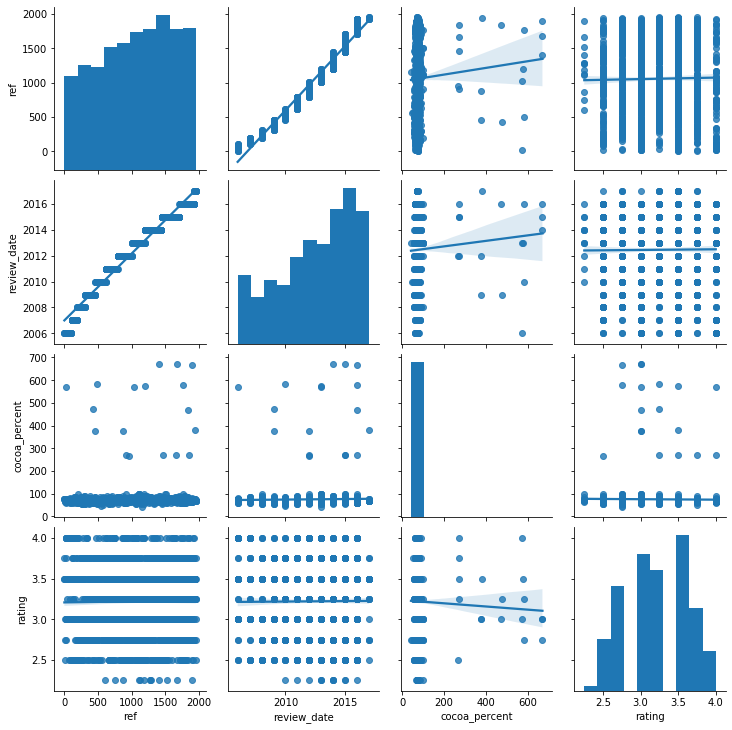

In [71]:
sns.pairplot(cacao, kind = 'reg')

In [72]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984927,0.038464,0.016306
review_date,0.984927,1.000000,0.031937,0.007524
cocoa_percent,0.038464,0.031937,1.000000,-0.020138
rating,0.016306,0.007524,-0.020138,1.000000


In [73]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

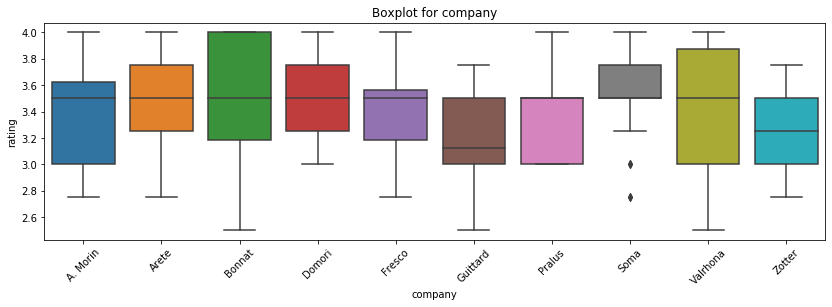

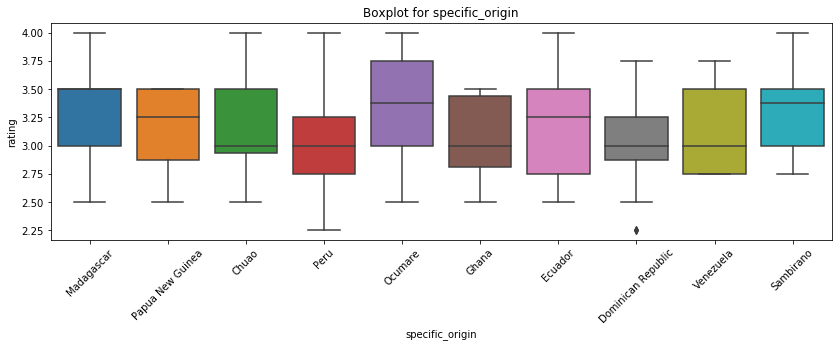

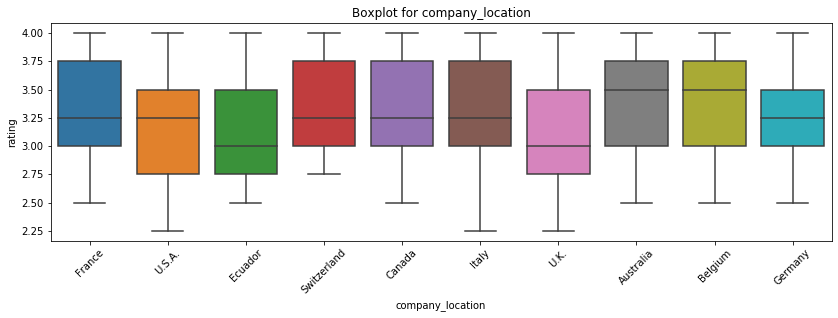

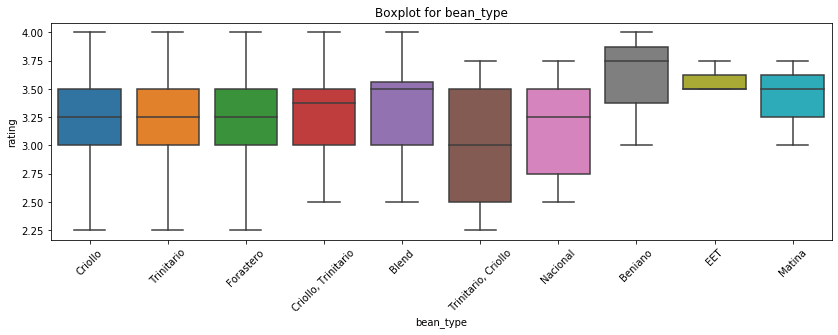

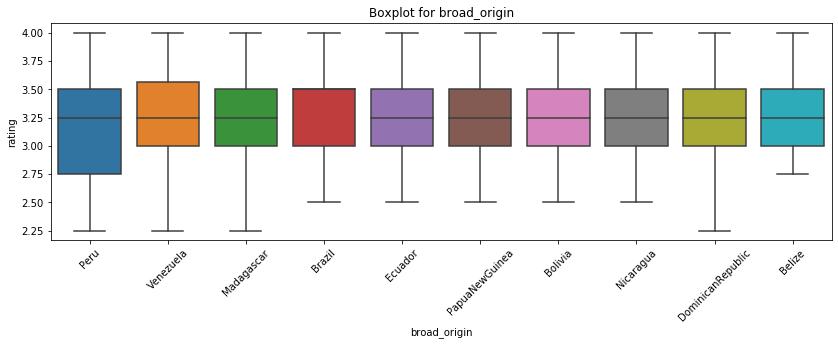

In [74]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

### Тест Стьюдента

In [16]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [18]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company


In [75]:
cols = cacao.loc[:, 'company'].value_counts().index[:10]
cols

Index(['Soma', 'Bonnat', 'Fresco', 'Pralus', 'Domori', 'A. Morin', 'Valrhona',
       'Arete', 'Guittard', 'Zotter'],
      dtype='object')

In [80]:
combinations_all = list(combinations(cols, 2))
combinations_all

[('Soma', 'Bonnat'),
 ('Soma', 'Fresco'),
 ('Soma', 'Pralus'),
 ('Soma', 'Domori'),
 ('Soma', 'A. Morin'),
 ('Soma', 'Valrhona'),
 ('Soma', 'Arete'),
 ('Soma', 'Guittard'),
 ('Soma', 'Zotter'),
 ('Bonnat', 'Fresco'),
 ('Bonnat', 'Pralus'),
 ('Bonnat', 'Domori'),
 ('Bonnat', 'A. Morin'),
 ('Bonnat', 'Valrhona'),
 ('Bonnat', 'Arete'),
 ('Bonnat', 'Guittard'),
 ('Bonnat', 'Zotter'),
 ('Fresco', 'Pralus'),
 ('Fresco', 'Domori'),
 ('Fresco', 'A. Morin'),
 ('Fresco', 'Valrhona'),
 ('Fresco', 'Arete'),
 ('Fresco', 'Guittard'),
 ('Fresco', 'Zotter'),
 ('Pralus', 'Domori'),
 ('Pralus', 'A. Morin'),
 ('Pralus', 'Valrhona'),
 ('Pralus', 'Arete'),
 ('Pralus', 'Guittard'),
 ('Pralus', 'Zotter'),
 ('Domori', 'A. Morin'),
 ('Domori', 'Valrhona'),
 ('Domori', 'Arete'),
 ('Domori', 'Guittard'),
 ('Domori', 'Zotter'),
 ('A. Morin', 'Valrhona'),
 ('A. Morin', 'Arete'),
 ('A. Morin', 'Guittard'),
 ('A. Morin', 'Zotter'),
 ('Valrhona', 'Arete'),
 ('Valrhona', 'Guittard'),
 ('Valrhona', 'Zotter'),
 ('Arete'

In [86]:
len(combinations_all)

45

In [76]:
cacao.loc[:, 'company'].value_counts()#.index[:10]

Soma               45
Bonnat             24
Fresco             24
Pralus             23
Domori             22
                   ..
Kiskadee            1
Hachez              1
Raoul Boulanger     1
Metropolitan        1
Xocolat             1
Name: company, Length: 396, dtype: int64

In [79]:
cacao['company'].value_counts().index[:10]

Index(['Soma', 'Bonnat', 'Fresco', 'Pralus', 'Domori', 'A. Morin', 'Valrhona',
       'Arete', 'Guittard', 'Zotter'],
      dtype='object')

In [85]:
cacao.loc[cacao.loc[:, 'company'] == 'Soma', 'rating']

1507    3.50
1508    3.50
1509    3.50
1511    3.75
1512    4.00
1513    3.25
1514    3.50
1515    4.00
1516    3.50
1517    3.75
1518    3.25
1519    3.50
1520    3.75
1521    3.25
1522    3.75
1523    3.25
1524    2.75
1525    3.75
1526    3.25
1527    3.75
1528    4.00
1529    4.00
1530    4.00
1531    3.25
1532    4.00
1533    3.25
1534    3.75
1535    4.00
1537    3.50
1538    3.75
1539    3.50
1540    3.50
1541    2.75
1542    3.50
1543    4.00
1544    4.00
1545    3.75
1546    3.50
1547    3.75
1548    3.00
1549    3.50
1550    3.00
1551    3.50
1552    3.75
1553    3.75
Name: rating, dtype: float64

In [91]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
2,A. Morin,Atsane,France,2015,670.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
